# Evaluation Metrics

## Confusion Matrix

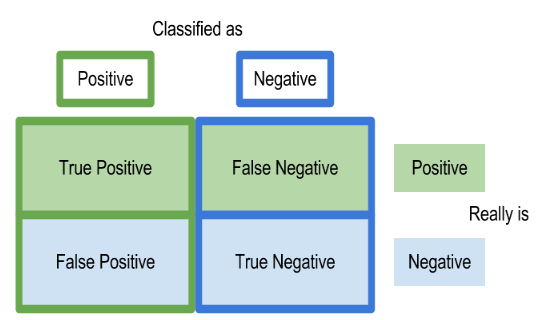

In [2]:
from IPython.display import Image
Image(filename='confusion matrix.png')

* Type 1 error and FP
  * Type 1 error is rejecting the null hypothesis when its actually true. 
  * False Positive is also called Type 1 error.

* Type 2 error and FN
  * Type 2 error is accepting the null hypothesis when its actually false
  * False Negative is also called Type 2 error.

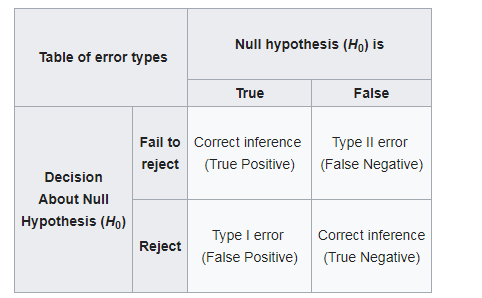

In [2]:
from IPython.display import Image
Image(filename='type of errors.png')

## Point Metrics
* accuracy = (tp + tn) / (tp + tn + fp  fn)
* sensitivity = recall = tp / t = tp / (tp + fn)
* specificity = tn / n = tn / (tn + fp)
* precision = tp / p = tp / (tp + fp)

## Tradeoff
### Sensitivity & Specificity
* ROC
* AUC
* TPR (= Sensitivity) vs FPR (= 1 - Specificity)

### Precision & Recall
* Precision Recall curve
* Area under PRC = Average Precision

http://cs229.stanford.edu/section/evaluation_metrics.pdf